In [1]:
# The dataset was built with excel, through internet research, with the majority of the information sourced from 
# governmental websites."

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('California_data-complete.xlsx')
data.head()

,city,county,total_rev2017,pop_2017,total_rev2021,pop_2021,unemployment2021,gini,tax_sales,crime_rate_per1000,...,taxable_sales2017,taxable_sales2021,revenue_variance,share_softd17,poverty,median_age2021,median_age2017,last_election,price2021,alcolism_rate
0,Adelanto,San Bernardino,15171753,34273,22556106,36569,0.148,0.4410,7.75,8.002088,...,3031740178,753541819,48.671719,15.428907,35.4,33.8,32.9,Liberal,NaN,17
1,Agoura Hills,Los Angeles,24695869,21018,26997269,19975,0.068,0.5022,9.50,1.024890,...,800469809,119297744,9.318967,5.812807,5.0,37.0,36.0,Liberal,3.01,17
2,Alameda,Alameda,236492783,79928,296987199,78262,0.056,0.4624,10.75,2.053050,...,149776625,923823384,25.579815,2.308340,8.1,38.0,37.3,Liberal,7.29,17
3,Albany,Alameda,31973269,18988,39261804,20542,0.036,0.4624,10.75,1.991734,...,340650900,233412871,22.795714,4.056122,9.4,38.0,37.3,Liberal,7.29,17
4,Alhambra,Los Angeles,121313323,86922,149426535,82182,0.079,0.5022,10.25,1.897757,...,105466641,157831631,23.174052,4.893730,14.0,37.0,36.0,Liberal,3.01,17


In [3]:
# Small dataframe
data.shape 

(482, 33)

In [4]:
data.dtypes

city                   object
county                 object
total_rev2017           int64
pop_2017                int64
total_rev2021           int64
pop_2021                int64
unemployment2021      float64
gini                  float64
tax_sales             float64
crime_rate_per1000    float64
income_capita           int64
bachelor_degree       float64
highschool            float64
tobacco_smokers       float64
cannabis_rev2021       object
tobacco_rev2021       float64
share_tobacco21       float64
tobacco_rev2017       float64
share_tobacco17       float64
alcohol_rev_cap_21    float64
share_alcohol21       float64
alcohol_rev_cap_17    float64
share_alcohol17       float64
taxable_sales2017       int64
taxable_sales2021       int64
revenue_variance      float64
share_softd17         float64
poverty               float64
median_age2021        float64
median_age2017        float64
last_election          object
price2021             float64
alcolism_rate           int64
dtype: obj

In [5]:
data.isnull().sum()

city                    0
county                  0
total_rev2017           0
pop_2017                0
total_rev2021           0
pop_2021                0
unemployment2021        0
gini                    0
tax_sales               0
crime_rate_per1000      0
income_capita           0
bachelor_degree         0
highschool              0
tobacco_smokers         0
cannabis_rev2021        0
tobacco_rev2021         0
share_tobacco21         0
tobacco_rev2017         0
share_tobacco17         0
alcohol_rev_cap_21      0
share_alcohol21         0
alcohol_rev_cap_17      0
share_alcohol17         0
taxable_sales2017       0
taxable_sales2021       0
revenue_variance        0
share_softd17           0
poverty                 0
median_age2021          0
median_age2017          0
last_election           0
price2021             346
alcolism_rate           0
dtype: int64

In [6]:
# Checking values of object column
data['cannabis_rev2021'].value_counts()

sale and delivery illegal    13
sale illegal                 12
manufacturing illegal         8
587755.2525000001             1
11538773.01                   1
                             ..
7734330.38                    1
31966732.919999998            1
2514693.81                    1
42374979.78                   1
1836593.2199999997            1
Name: cannabis_rev2021, Length: 452, dtype: int64

In [7]:
# Dropping rows where there is no official data about the cannabis revenue
data = data.drop(data[data['cannabis_rev2021'] == 'sale and delivery illegal'].index) 
data = data.drop(data[data['cannabis_rev2021'] == 'manufacturing illegal'].index)
data = data.drop(data[data['cannabis_rev2021'] == 'sale illegal'].index)
data = data.drop(data[data['cannabis_rev2021'] == 'legal'].index)

In [8]:
# Checking if there is still any missing data
data['cannabis_rev2021'].value_counts()

5.877553e+05    1
3.727934e+06    1
2.276045e+06    1
2.778529e+07    1
5.617816e+04    1
               ..
3.196673e+07    1
2.514694e+06    1
4.237498e+07    1
6.277100e+06    1
1.836593e+06    1
Name: cannabis_rev2021, Length: 448, dtype: int64

In [9]:
# Transforming column in numeric
data['cannabis_rev2021'] = pd.to_numeric(data['cannabis_rev2021'], errors='coerce')

In [10]:
# Checking if it worked
data.dtypes

city                   object
county                 object
total_rev2017           int64
pop_2017                int64
total_rev2021           int64
pop_2021                int64
unemployment2021      float64
gini                  float64
tax_sales             float64
crime_rate_per1000    float64
income_capita           int64
bachelor_degree       float64
highschool            float64
tobacco_smokers       float64
cannabis_rev2021      float64
tobacco_rev2021       float64
share_tobacco21       float64
tobacco_rev2017       float64
share_tobacco17       float64
alcohol_rev_cap_21    float64
share_alcohol21       float64
alcohol_rev_cap_17    float64
share_alcohol17       float64
taxable_sales2017       int64
taxable_sales2021       int64
revenue_variance      float64
share_softd17         float64
poverty               float64
median_age2021        float64
median_age2017        float64
last_election          object
price2021             float64
alcolism_rate           int64
dtype: obj

In [11]:
# Checking values of column with nulls
data['price2021'].value_counts()

3.01    87
5.29    28
1.13     9
3.68     7
7.29     4
3.53     1
Name: price2021, dtype: int64

In [12]:
# Replacing nulls with mean price
data['price2021'].fillna('7.29', inplace=True)

In [13]:
# Checking if it worked
data['price2021'].value_counts()

7.29    312
3.01     87
5.29     28
1.13      9
3.68      7
7.29      4
3.53      1
Name: price2021, dtype: int64

In [14]:
# Transforming column in numeric
data['price2021'] = pd.to_numeric(data['price2021'], errors='coerce')

In [15]:
# Checking outliers
sorted_column = data['crime_rate_per1000'].sort_values(ascending=False) 
print(sorted_column)

448    241.000000
384     22.113022
84      18.518519
39      14.309923
282     14.197161
          ...    
187      0.276396
211      0.148854
77       0.080932
268      0.000000
432      0.000000
Name: crime_rate_per1000, Length: 448, dtype: float64


In [16]:
# Dropping the outlier
data.drop(448, axis=0, inplace=True)

In [17]:
sorted_column = data['pop_2021'].sort_values(ascending=False) 
print(sorted_column)

240    3853323
366    1371832
373     991144
369     849475
151     542720
        ...   
145        694
133        684
326        446
384        378
435        300
Name: pop_2021, Length: 447, dtype: int64


In [18]:
# Droping the columns with no relevant correlation.

In [18]:
data.drop('city', axis=1, inplace=True)

In [19]:
data.drop('county', axis=1, inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5696\2951207716.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


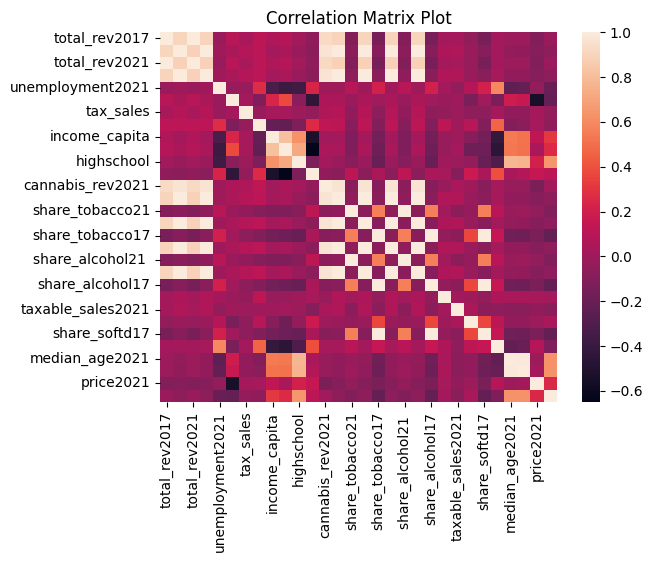

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix Plot')
plt.show()

<Axes: >

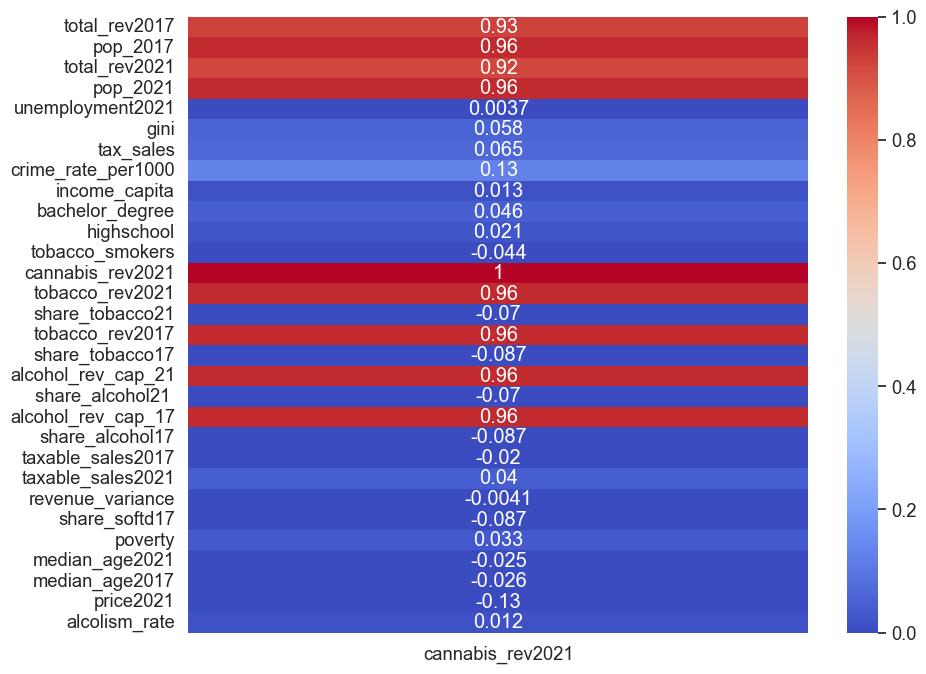

In [23]:
target_feature = 'cannabis_rev2021'
corr_target = corr_matrix.loc[:, target_feature]

sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_target.to_frame(), vmin=0.0, vmax=1.0, cmap='coolwarm', annot=True)

In [24]:
# Multicollinearity: The 2017 data columns exhibit multicollinearity, it can lead to instability in the model's coefficients
# and reduce its predictive accuracy. Removing can improve the model's performance.
columns_to_drop = ['revenue_variance','median_age2017', 'taxable_sales2017', 'alcohol_rev_cap_17','pop_2017', 'total_rev2017', 'tobacco_rev2017','share_softd17','share_tobacco17', 'share_alcohol17']
data.drop(columns=columns_to_drop, inplace=True)

In [25]:
data.shape

(447, 21)

In [26]:
# Renaming the columns because there is no more need for year indicator 
data.rename(columns={'total_rev2021': 'totalrev'}, inplace=True)
data.rename(columns={'pop_2021': 'population'}, inplace=True)
data.rename(columns={'unemployment2021': 'unemployment'}, inplace=True)                                
data.rename(columns={'cannabis_rev2021': 'cannabis_rev'}, inplace=True)
data.rename(columns={'tobacco_rev2021': 'tobacco_rev'}, inplace=True)
data.rename(columns={'alcohol_rev_cap_21': 'alcoholrev_cap'}, inplace=True)                                
data.rename(columns={'taxable_sales2021': 'taxable_sales'}, inplace=True)
data.rename(columns={'median_age2021': 'median_age'}, inplace=True)
data.rename(columns={'price2021': 'price'}, inplace=True) 
data.rename(columns={'share_tobacco21': 'share_tobacco'}, inplace=True) 
data.rename(columns={'share_alcohol21 ': 'share_alcohol'}, inplace=True)  

In [27]:
# Checking result
data.T

,0,1,2,3,4,5,8,9,10,11,...,471,472,473,474,475,476,477,478,480,481
totalrev,22556106,26997269,296987199,39261804,149426535,24304501,51354614,1314827686,19785579,13256555,...,44499861,17315740,11306950,170875753,12585826,71143518,16067012,15958386,51741030,25238130
population,36569,19975,78262,20542,82182,51233,21566,344604,11181,3641,...,26134,7399,7513,60999,5271,67760,2942,7777,54830,21846
unemployment,0.148,0.068,0.056,0.036,0.079,0.051,0.06,0.069,0.069,0.065,...,0.054,0.03,0.088,0.074,0.034,0.049,0.092,0.045,0.057,0.102
gini,0.441,0.5022,0.4624,0.4624,0.5022,0.47,0.4719,0.47,0.4603,0.4617,...,0.4589,0.4931,0.4755,0.4931,0.4852,0.47,0.4719,0.4594,0.441,0.441
tax_sales,7.75,9.5,10.75,10.75,10.25,7.75,7.75,7.75,7.75,7.75,...,8.5,7.25,8.75,8.0,9.375,7.75,7.75,7.75,7.75,8.75
crime_rate_per1000,8.002088,1.02489,2.05305,1.991734,1.897757,0.516776,2.591434,3.164602,5.784732,1.534919,...,2.072835,1.491728,3.644884,3.661567,2.09,0.61561,1.67336,3.719942,3.706174,7.319974
income_capita,23956,32469,44283,44283,32469,38590,42677,38590,27983,32494,...,39929,32598,20421,32598,57375,38590,42677,28130,23956,23956
bachelor_degree,20.3,31.8,46.0,46.0,31.8,39.9,34.9,39.9,22.2,18.7,...,34.9,41.6,14.3,41.6,49.9,39.9,34.9,22.5,20.3,20.3
highschool,79.5,78.7,88.0,88.0,78.7,85.1,85.1,85.1,90.8,90.4,...,88.0,86.4,69.8,86.4,89.2,85.1,85.1,90.0,79.5,79.5
tobacco_smokers,14.4,11.0,10.0,10.0,11.0,10.5,12.3,10.5,19.4,15.3,...,12.3,5.6,10.4,5.6,9.3,10.2,15.6,20.3,14.4,11.1


In [28]:
# Getting numericals to plot and check if data has normal distribution
numerical_cols = data.select_dtypes(include=['int', 'float']).columns
numerical = data[numerical_cols]
numerical.head(20)

,totalrev,population,unemployment,gini,tax_sales,crime_rate_per1000,income_capita,bachelor_degree,highschool,tobacco_smokers,cannabis_rev,tobacco_rev,share_tobacco,alcoholrev_cap,share_alcohol,taxable_sales,poverty,median_age,price,alcolism_rate
0,22556106,36569,0.148,0.4410,7.750,8.002088,23956,20.3,79.5,14.4,5.877553e+05,1.730354e+06,7.671331,4.777520e+05,2.118061,753541819,35.4,33.8,7.29,17
1,26997269,19975,0.068,0.5022,9.500,1.024890,32469,31.8,78.7,11.0,3.727934e+06,9.451671e+05,3.500973,2.609614e+05,0.966621,119297744,5.0,37.0,3.01,17
2,296987199,78262,0.056,0.4624,10.750,2.053050,44283,46.0,88.0,10.0,1.997090e+07,3.703162e+06,1.246910,1.022446e+06,0.344273,923823384,8.1,38.0,7.29,17
3,39261804,20542,0.036,0.4624,10.750,1.991734,44283,46.0,88.0,10.0,5.241908e+06,9.719961e+05,2.475679,2.683689e+05,0.683537,233412871,9.4,38.0,7.29,17
4,149426535,82182,0.079,0.5022,10.250,1.897757,32469,31.8,78.7,11.0,1.533763e+07,3.888647e+06,2.602380,1.073659e+06,0.718519,157831631,14.0,37.0,3.01,17
5,24304501,51233,0.051,0.4700,7.750,0.516776,38590,39.9,85.1,10.5,5.075653e+06,2.424217e+06,9.974356,6.693284e+05,2.753928,452787963,4.2,38.5,7.29,18
8,51354614,21566,0.060,0.4719,7.750,2.591434,42677,34.9,85.1,12.3,2.187008e+06,1.020449e+06,1.987064,2.817469e+05,0.548630,92769728,8.4,42.1,7.29,21
9,1314827686,344604,0.069,0.4700,7.750,3.164602,38590,39.9,85.1,10.5,3.413992e+07,1.630580e+07,1.240147,4.502044e+06,0.342406,439138135,15.2,38.5,7.29,18
10,19785579,11181,0.069,0.4603,7.750,5.784732,27983,22.2,90.8,19.4,5.106810e+06,5.290570e+05,2.673952,1.460731e+05,0.738280,347056158,18.2,41.5,7.29,21
11,13256555,3641,0.065,0.4617,7.750,1.534919,32494,18.7,90.4,15.3,1.242615e+07,1.722830e+05,1.299606,4.756748e+04,0.358822,148542340,5.3,52.3,7.29,22


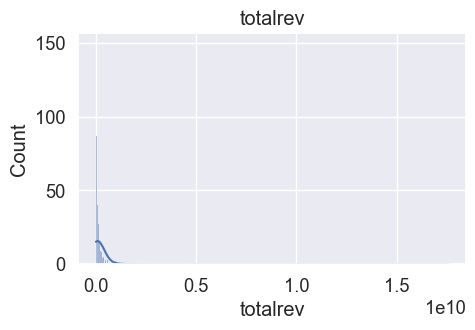

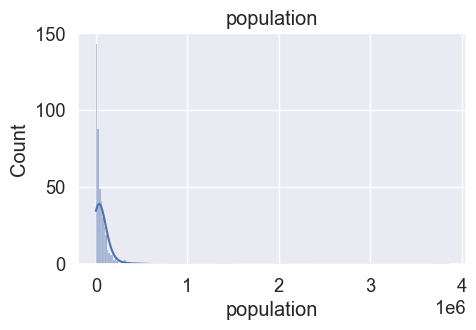

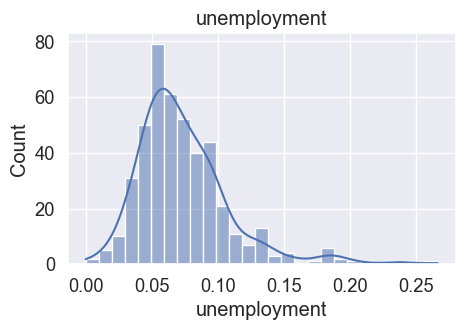

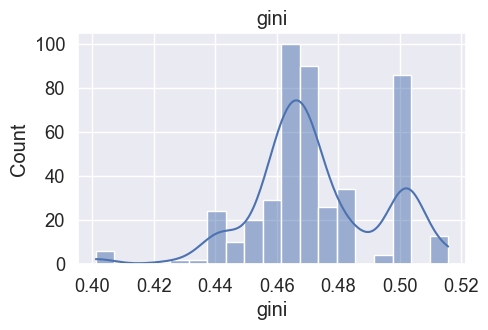

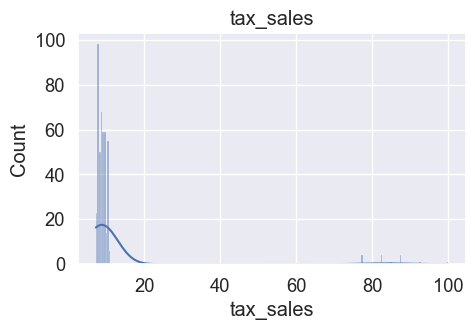

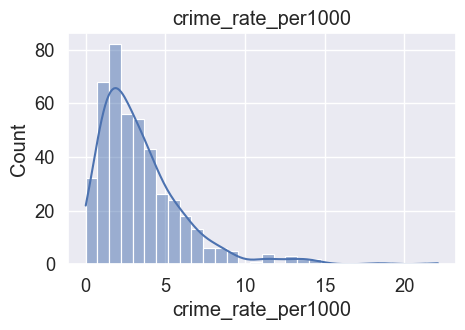

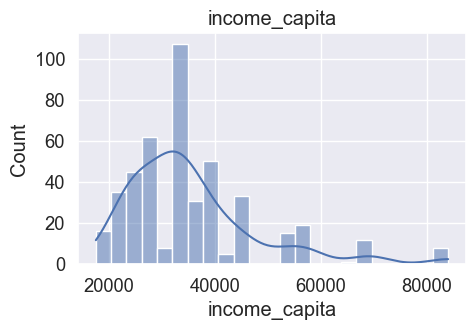

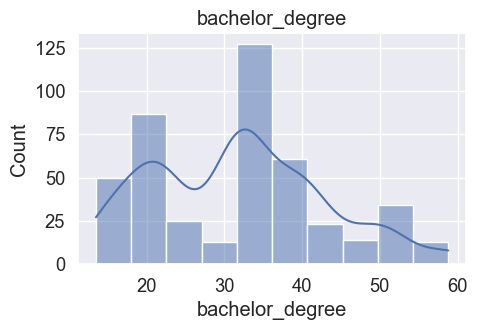

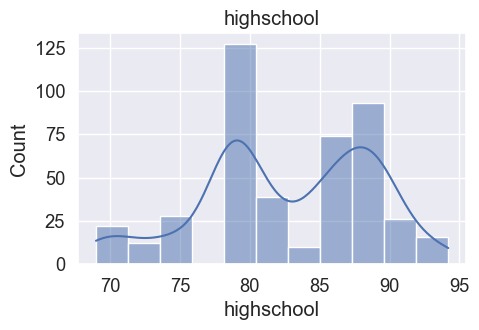

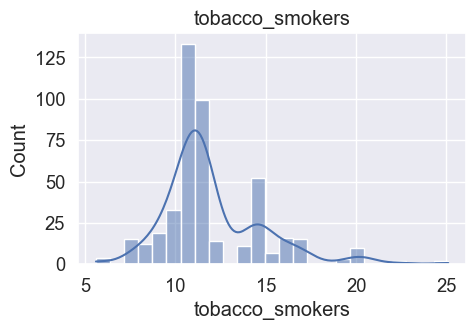

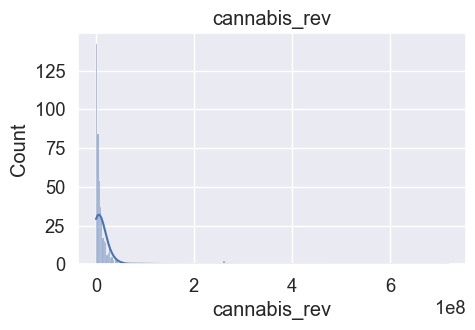

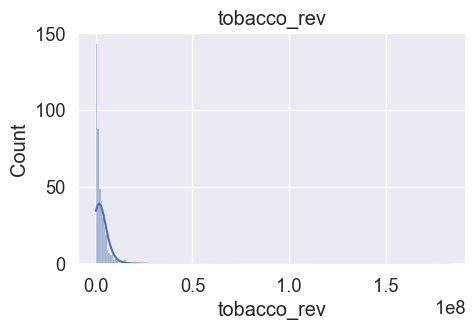

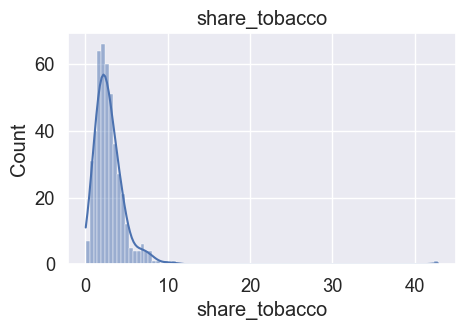

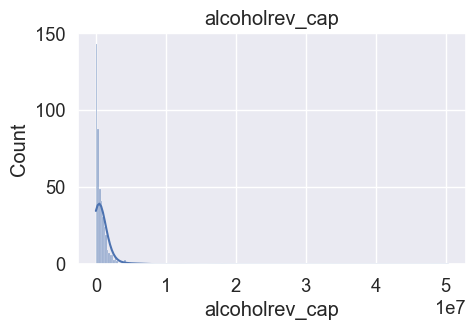

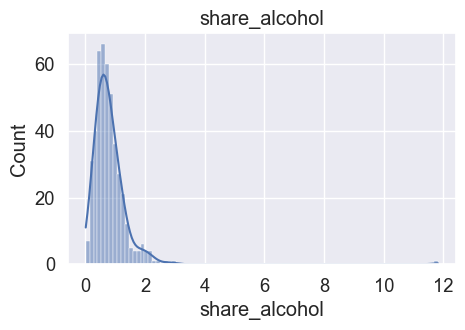

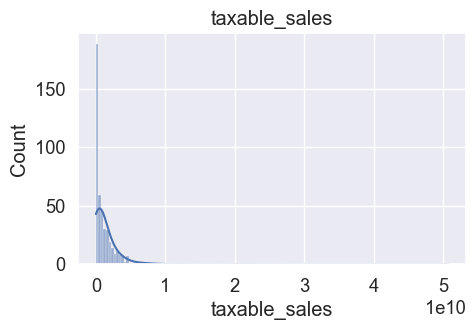

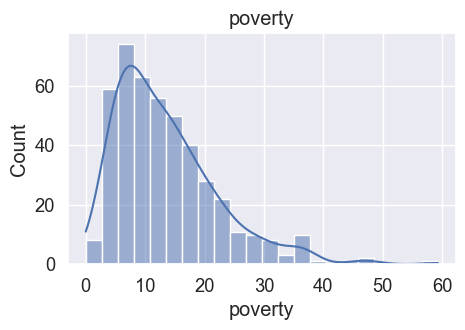

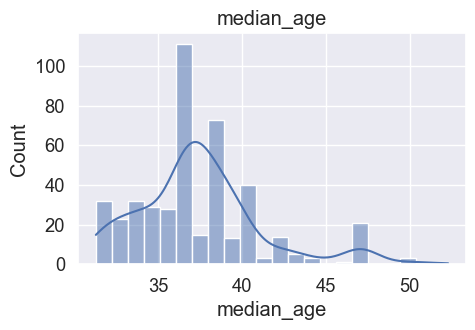

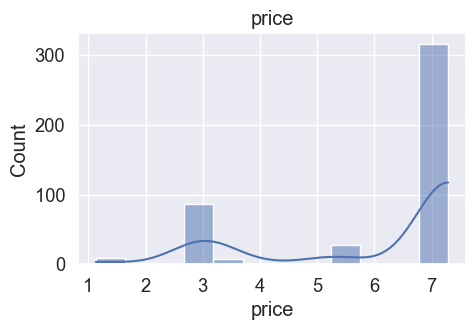

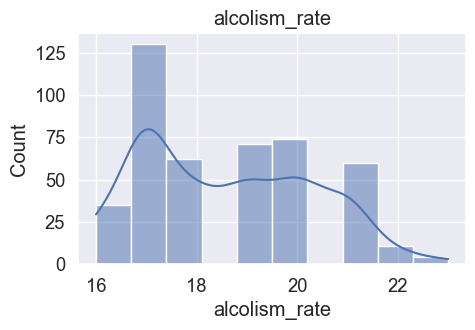

In [29]:
import seaborn as sns

for column in numerical.columns:
    plt.figure(figsize=(5, 3)) 
    sns.histplot(numerical[column], kde=True)  # kde=True adds a kernel density estimate to the histogram
    plt.title(column) 
    plt.show()


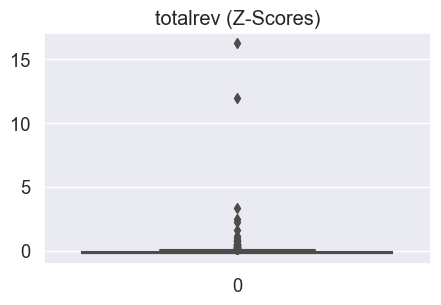

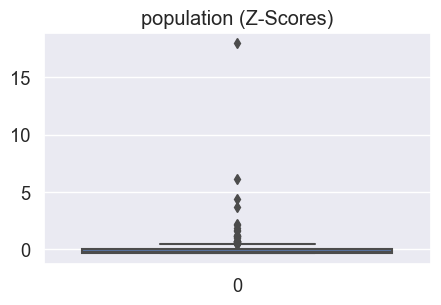

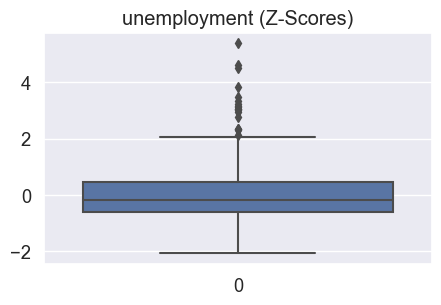

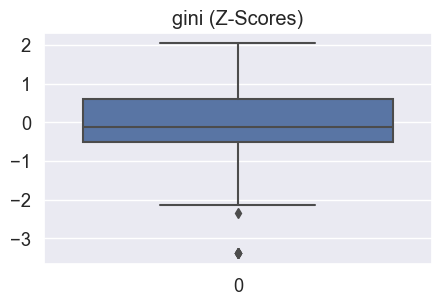

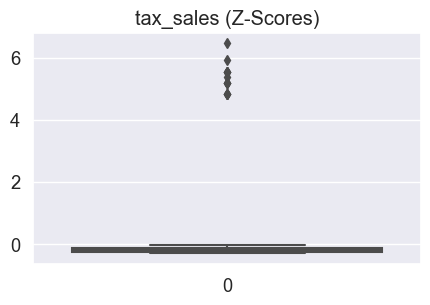

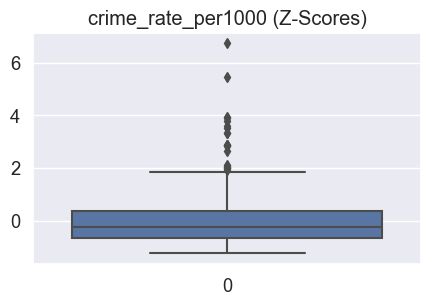

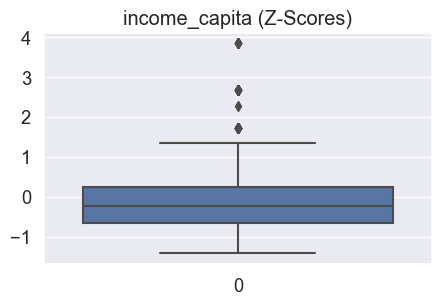

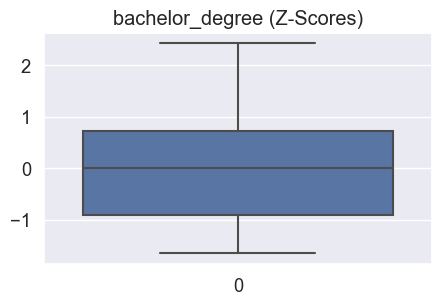

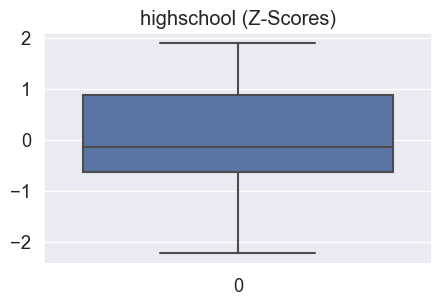

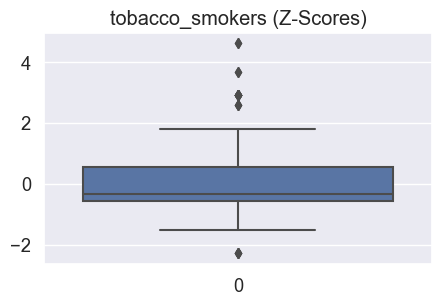

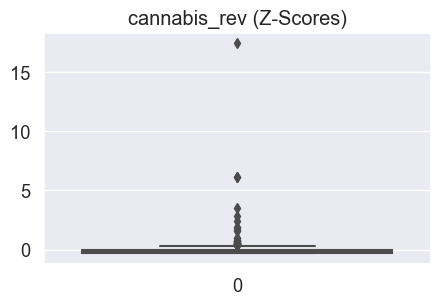

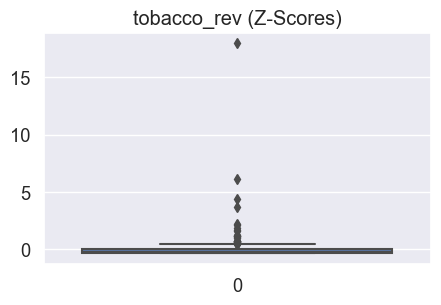

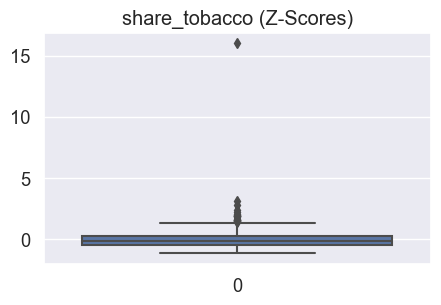

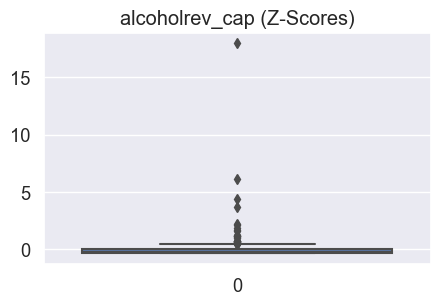

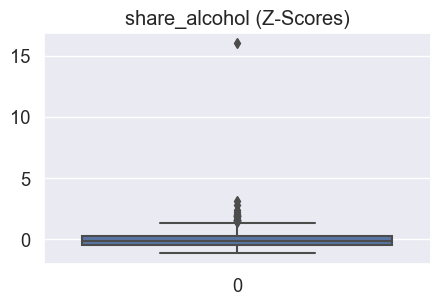

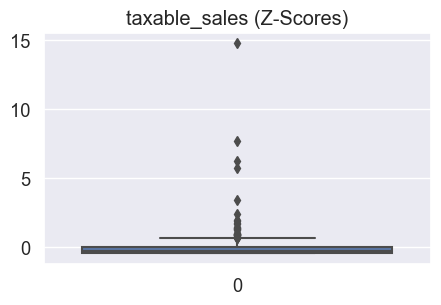

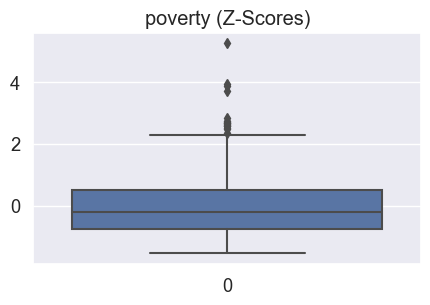

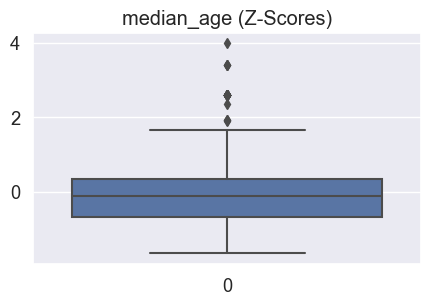

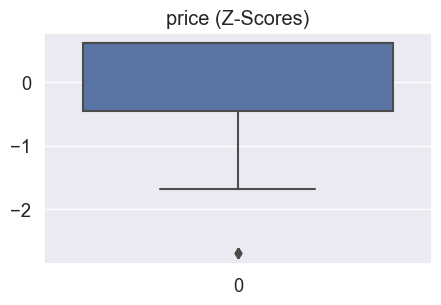

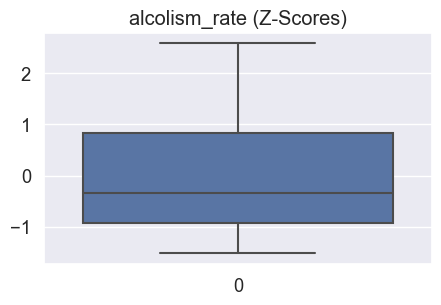

In [30]:
import seaborn as sns

# Calculating z-scores for each column
z_scores_df = (numerical - numerical.mean()) / numerical.std()

# Creating box plots
for column in z_scores_df.columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=z_scores_df[column])
    plt.title(column + " (Z-Scores)")
    plt.show()

In [28]:
# Graphs show imbalanced data.

In [31]:
# Getting categorical column 
categoricalcol = data.select_dtypes(include=['object']).columns
categorical = data[categoricalcol]
categorical.head()

,last_election
0,Liberal
1,Liberal
2,Liberal
3,Liberal
4,Liberal


In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
# Encoding categorical as numerical to use in the model
encoder = OneHotEncoder()
encoded = encoder.fit_transform(categorical)
cat_hot = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(input_features=categorical.columns))
cat_hot = cat_hot.reset_index(drop=True)
cat_hot.head()

,last_election_Conservative,last_election_Liberal
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [34]:
model_data = pd.concat([numerical.reset_index(drop=True), cat_hot.reset_index(drop=True)], axis=1)

print(model_data.isnull().sum())

totalrev                      0
population                    0
unemployment                  0
gini                          0
tax_sales                     0
crime_rate_per1000            0
income_capita                 0
bachelor_degree               0
highschool                    0
tobacco_smokers               0
cannabis_rev                  0
tobacco_rev                   0
share_tobacco                 0
alcoholrev_cap                0
share_alcohol                 0
taxable_sales                 0
poverty                       0
median_age                    0
price                         0
alcolism_rate                 0
last_election_Conservative    0
last_election_Liberal         0
dtype: int64


model_data.head()

In [35]:
model_data.head()

,totalrev,population,unemployment,gini,tax_sales,crime_rate_per1000,income_capita,bachelor_degree,highschool,tobacco_smokers,...,share_tobacco,alcoholrev_cap,share_alcohol,taxable_sales,poverty,median_age,price,alcolism_rate,last_election_Conservative,last_election_Liberal
0,22556106,36569,0.148,0.4410,7.75,8.002088,23956,20.3,79.5,14.4,...,7.671331,4.777520e+05,2.118061,753541819,35.4,33.8,7.29,17,0.0,1.0
1,26997269,19975,0.068,0.5022,9.50,1.024890,32469,31.8,78.7,11.0,...,3.500973,2.609614e+05,0.966621,119297744,5.0,37.0,3.01,17,0.0,1.0
2,296987199,78262,0.056,0.4624,10.75,2.053050,44283,46.0,88.0,10.0,...,1.246910,1.022446e+06,0.344273,923823384,8.1,38.0,7.29,17,0.0,1.0
3,39261804,20542,0.036,0.4624,10.75,1.991734,44283,46.0,88.0,10.0,...,2.475679,2.683689e+05,0.683537,233412871,9.4,38.0,7.29,17,0.0,1.0
4,149426535,82182,0.079,0.5022,10.25,1.897757,32469,31.8,78.7,11.0,...,2.602380,1.073659e+06,0.718519,157831631,14.0,37.0,3.01,17,0.0,1.0


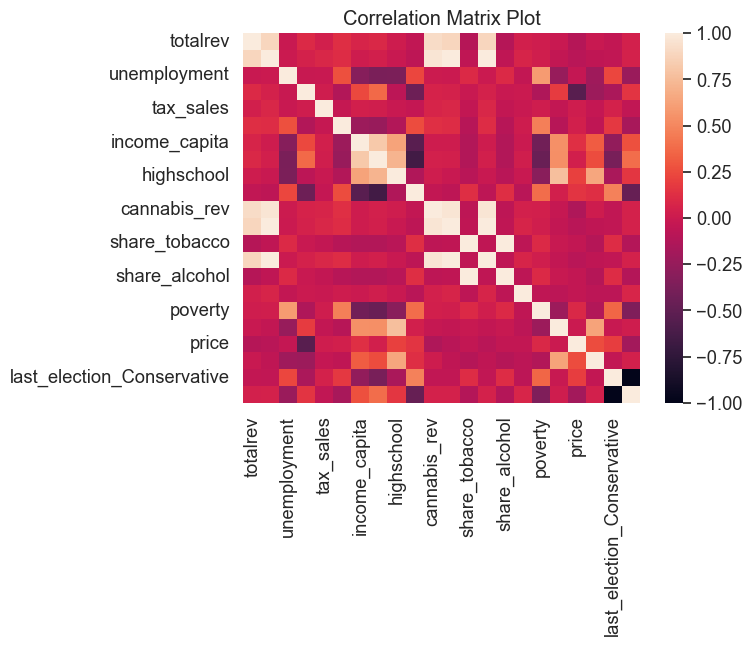

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = model_data.corr()
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix Plot')
plt.show()

In [37]:
# Dropping irrelevant columns and variables that are not available online for the countries.
columns_to_drop2 = ['last_election_Conservative', 'last_election_Liberal', 'taxable_sales', 'share_tobacco', 'share_alcohol', 'tobacco_rev', 'alcoholrev_cap']
model_data.drop(columns=columns_to_drop2, inplace=True)
model_data.head()

,totalrev,population,unemployment,gini,tax_sales,crime_rate_per1000,income_capita,bachelor_degree,highschool,tobacco_smokers,cannabis_rev,poverty,median_age,price,alcolism_rate
0,22556106,36569,0.148,0.4410,7.75,8.002088,23956,20.3,79.5,14.4,5.877553e+05,35.4,33.8,7.29,17
1,26997269,19975,0.068,0.5022,9.50,1.024890,32469,31.8,78.7,11.0,3.727934e+06,5.0,37.0,3.01,17
2,296987199,78262,0.056,0.4624,10.75,2.053050,44283,46.0,88.0,10.0,1.997090e+07,8.1,38.0,7.29,17
3,39261804,20542,0.036,0.4624,10.75,1.991734,44283,46.0,88.0,10.0,5.241908e+06,9.4,38.0,7.29,17
4,149426535,82182,0.079,0.5022,10.25,1.897757,32469,31.8,78.7,11.0,1.533763e+07,14.0,37.0,3.01,17


In [38]:
model_data.to_csv('modeldata.csv', index=False)